Primeras 10 filas del DataFrame:
   Ángulo (rad) Serie Nº 11  Intensidad luminosa (%) Serie Nº 11
0                       0.0                                  2.0
1                       NaN                                  2.0
2                       NaN                                  2.0
3                       0.0                                  NaN
4                       NaN                                  2.0
5                       NaN                                  2.0
6                       0.0                                  2.1
7                       NaN                                  2.1
8                       NaN                                  2.1
9                       0.0                                  NaN

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               ----------

C:\Users\USER\AppData\Local\Temp\ipykernel_19312\2620495838.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['Ángulo (rad) Serie Nº 11'] = df_clean['Ángulo (rad) Serie Nº 11'].fillna(method='ffill')


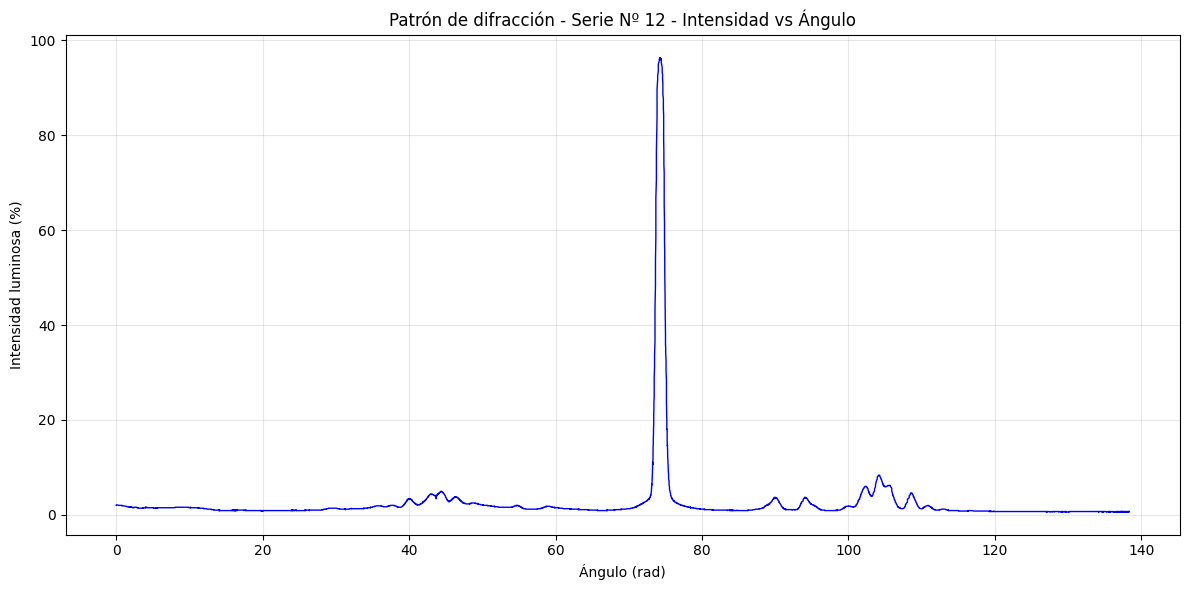


Máxima intensidad: 96.40% en ángulo: 74.299 rad
Número de puntos con intensidad > 48.20%: 55


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('2.csv', sep=';', decimal=',', encoding='utf-8')

# Mostrar las primeras filas para entender la estructura
print("Primeras 10 filas del DataFrame:")
print(df.head(10))

# Ver información sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos en ambas columnas
df_clean = df.dropna(subset=['Ángulo (rad) Serie Nº 11', 'Intensidad luminosa (%) Serie Nº 11'], how='all')

# Llenar valores nulos en la columna de ángulo con el último valor válido (forward fill)
df_clean['Ángulo (rad) Serie Nº 11'] = df_clean['Ángulo (rad) Serie Nº 11'].fillna(method='ffill')

# Eliminar filas donde la intensidad luminosa es nula
df_clean = df_clean.dropna(subset=['Intensidad luminosa (%) Serie Nº 11'])

# Convertir las columnas a arrays numpy
angulos = df_clean['Ángulo (rad) Serie Nº 11'].values
intensidades = df_clean['Intensidad luminosa (%) Serie Nº 11'].values

# Mostrar información sobre los arrays resultantes
print(f"\nNúmero de puntos de ángulo: {len(angulos)}")
print(f"Número de puntos de intensidad: {len(intensidades)}")
print(f"\nPrimeros 10 valores de ángulo: {angulos[:10]}")
print(f"Primeros 10 valores de intensidad: {intensidades[:10]}")


print("\nDatos guardados en 'datos_espectro_serie12.npz'")

# Crear un gráfico para visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(angulos, intensidades, 'b-', linewidth=1)
plt.xlabel('Ángulo (rad)')
plt.ylabel('Intensidad luminosa (%)')
plt.title('Patrón de difracción - Serie Nº 12 - Intensidad vs Ángulo')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('patron_difraccion_serie12.png', dpi=300)
plt.show()

# Análisis adicional: encontrar picos de intensidad
# Encontrar el máximo de intensidad
max_intensidad = np.max(intensidades)
angulo_max_intensidad = angulos[np.argmax(intensidades)]
print(f"\nMáxima intensidad: {max_intensidad:.2f}% en ángulo: {angulo_max_intensidad:.3f} rad")

# Encontrar picos significativos (umbral del 50% del máximo)
umbral = 0.5 * max_intensidad
picos_significativos = intensidades > umbral
num_picos = np.sum(picos_significativos)
print(f"Número de puntos con intensidad > {umbral:.2f}%: {num_picos}")

C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3271874608.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3271874608.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3271874608.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')


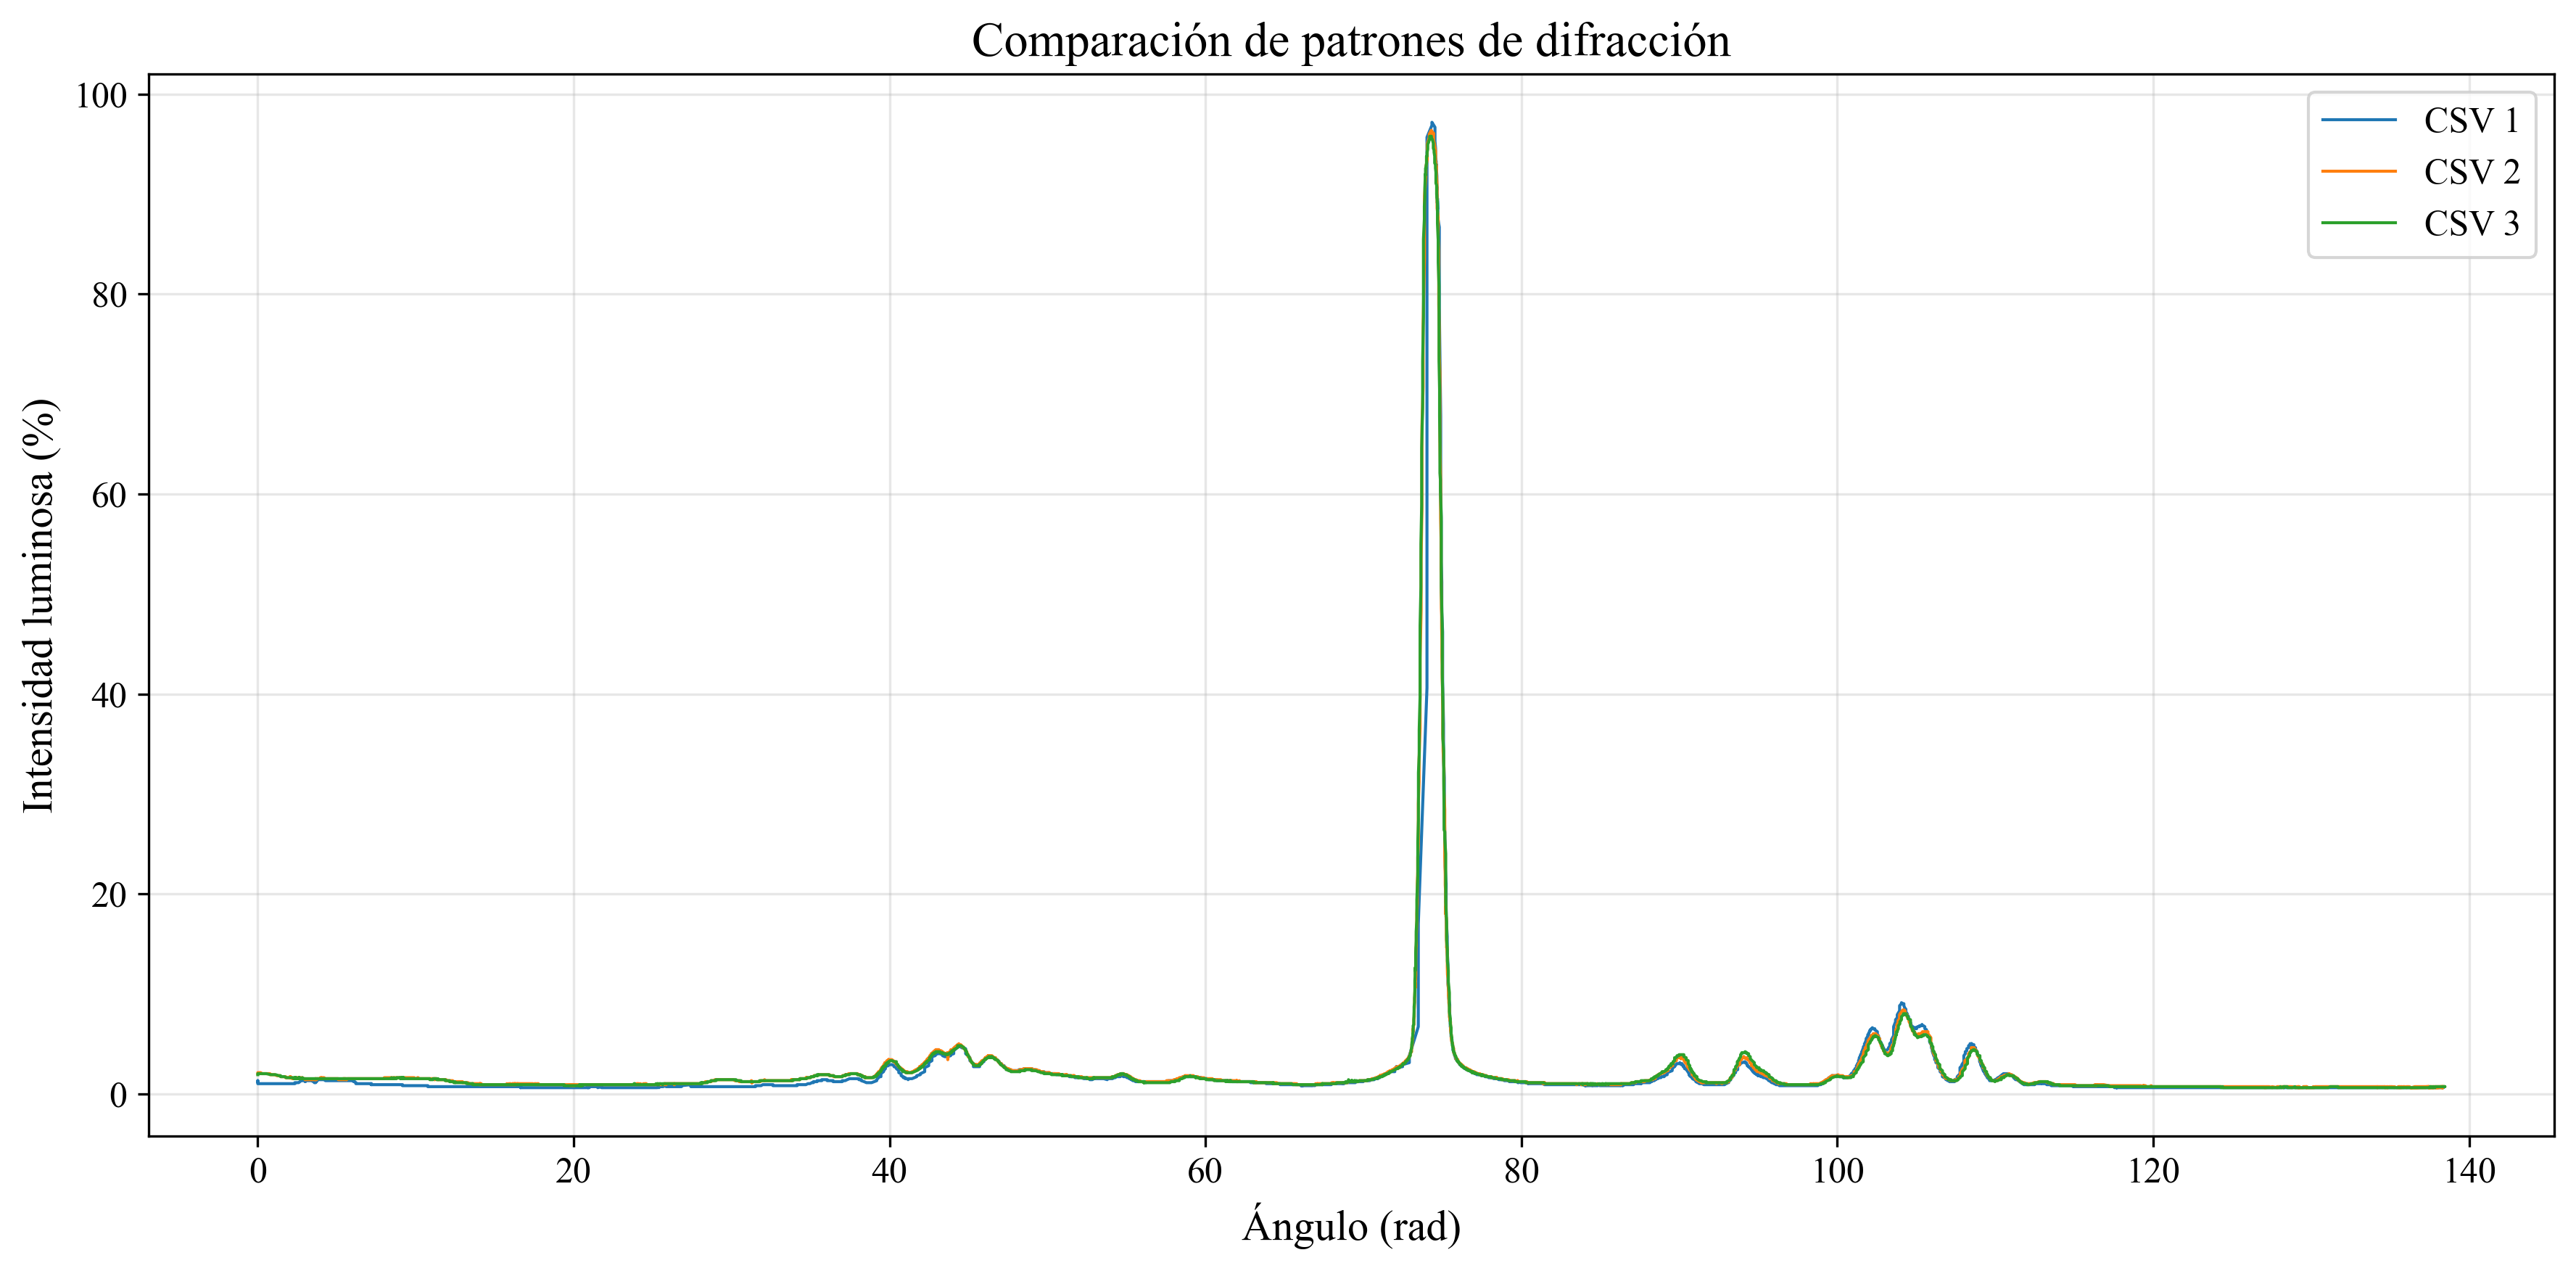

Pico CSV 1 -> Ángulo: 74.33800 rad, Intensidad: 97.20%
Pico CSV 2 -> Ángulo: 74.29900 rad, Intensidad: 96.40%
Pico CSV 3 -> Ángulo: 74.19800 rad, Intensidad: 95.80%


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar y limpiar datos
def cargar_datos_csv(nombre_csv):
    df = pd.read_csv(nombre_csv, sep=';', decimal=',', encoding='utf-8')

    col_angulo = [c for c in df.columns if "Ángulo" in c][0]
    col_intensidad = [c for c in df.columns if "Intensidad" in c][0]

    df_clean = df.dropna(subset=[col_angulo, col_intensidad], how='all')
    df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
    df_clean = df_clean.dropna(subset=[col_intensidad])

    angulos = df_clean[col_angulo].values
    intensidades = df_clean[col_intensidad].values

    return angulos, intensidades

# Cargar los tres archivos
ang1, inten1 = cargar_datos_csv("1.csv")
ang2, inten2 = cargar_datos_csv("2.csv")
ang3, inten3 = cargar_datos_csv("3.csv")

# Graficar en un mismo gráfico
plt.figure(figsize=(12, 6))
plt.plot(ang1, inten1, label="CSV 1", linewidth=1)
plt.plot(ang2, inten2, label="CSV 2", linewidth=1)
plt.plot(ang3, inten3, label="CSV 3", linewidth=1)

plt.xlabel("Ángulo (rad)")
plt.ylabel("Intensidad luminosa (%)")
plt.title("Comparación de patrones de difracción")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("comparacion_patrones.png", dpi=300)
plt.show()
# Encontrar los picos (máximos)
idx1 = np.argmax(inten1)
idx2 = np.argmax(inten2)
idx3 = np.argmax(inten3)

pico1 = (ang1[idx1], inten1[idx1])
pico2 = (ang2[idx2], inten2[idx2])
pico3 = (ang3[idx3], inten3[idx3])

# Mostrar resultados
print(f"Pico CSV 1 -> Ángulo: {pico1[0]:.5f} rad, Intensidad: {pico1[1]:.2f}%")
print(f"Pico CSV 2 -> Ángulo: {pico2[0]:.5f} rad, Intensidad: {pico2[1]:.2f}%")
print(f"Pico CSV 3 -> Ángulo: {pico3[0]:.5f} rad, Intensidad: {pico3[1]:.2f}%")


C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3076669618.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')


Picos con intensidad > 2.5% en CSV 1:
Ángulo (rad)	Intensidad (%)
------------------------------
40.03300		2.90%
43.06200		4.00%
44.37500		4.70%
46.44300		3.70%
72.09100		2.70%
74.33800		97.20%
74.60800		93.00%
74.67400		89.90%
74.68700		89.60%
89.69700		2.80%
90.03300		3.10%
90.26400		2.80%
94.14700		3.20%
102.22400		6.60%
104.06500		9.10%
104.97700		6.60%
105.37000		6.90%
108.51600		5.00%


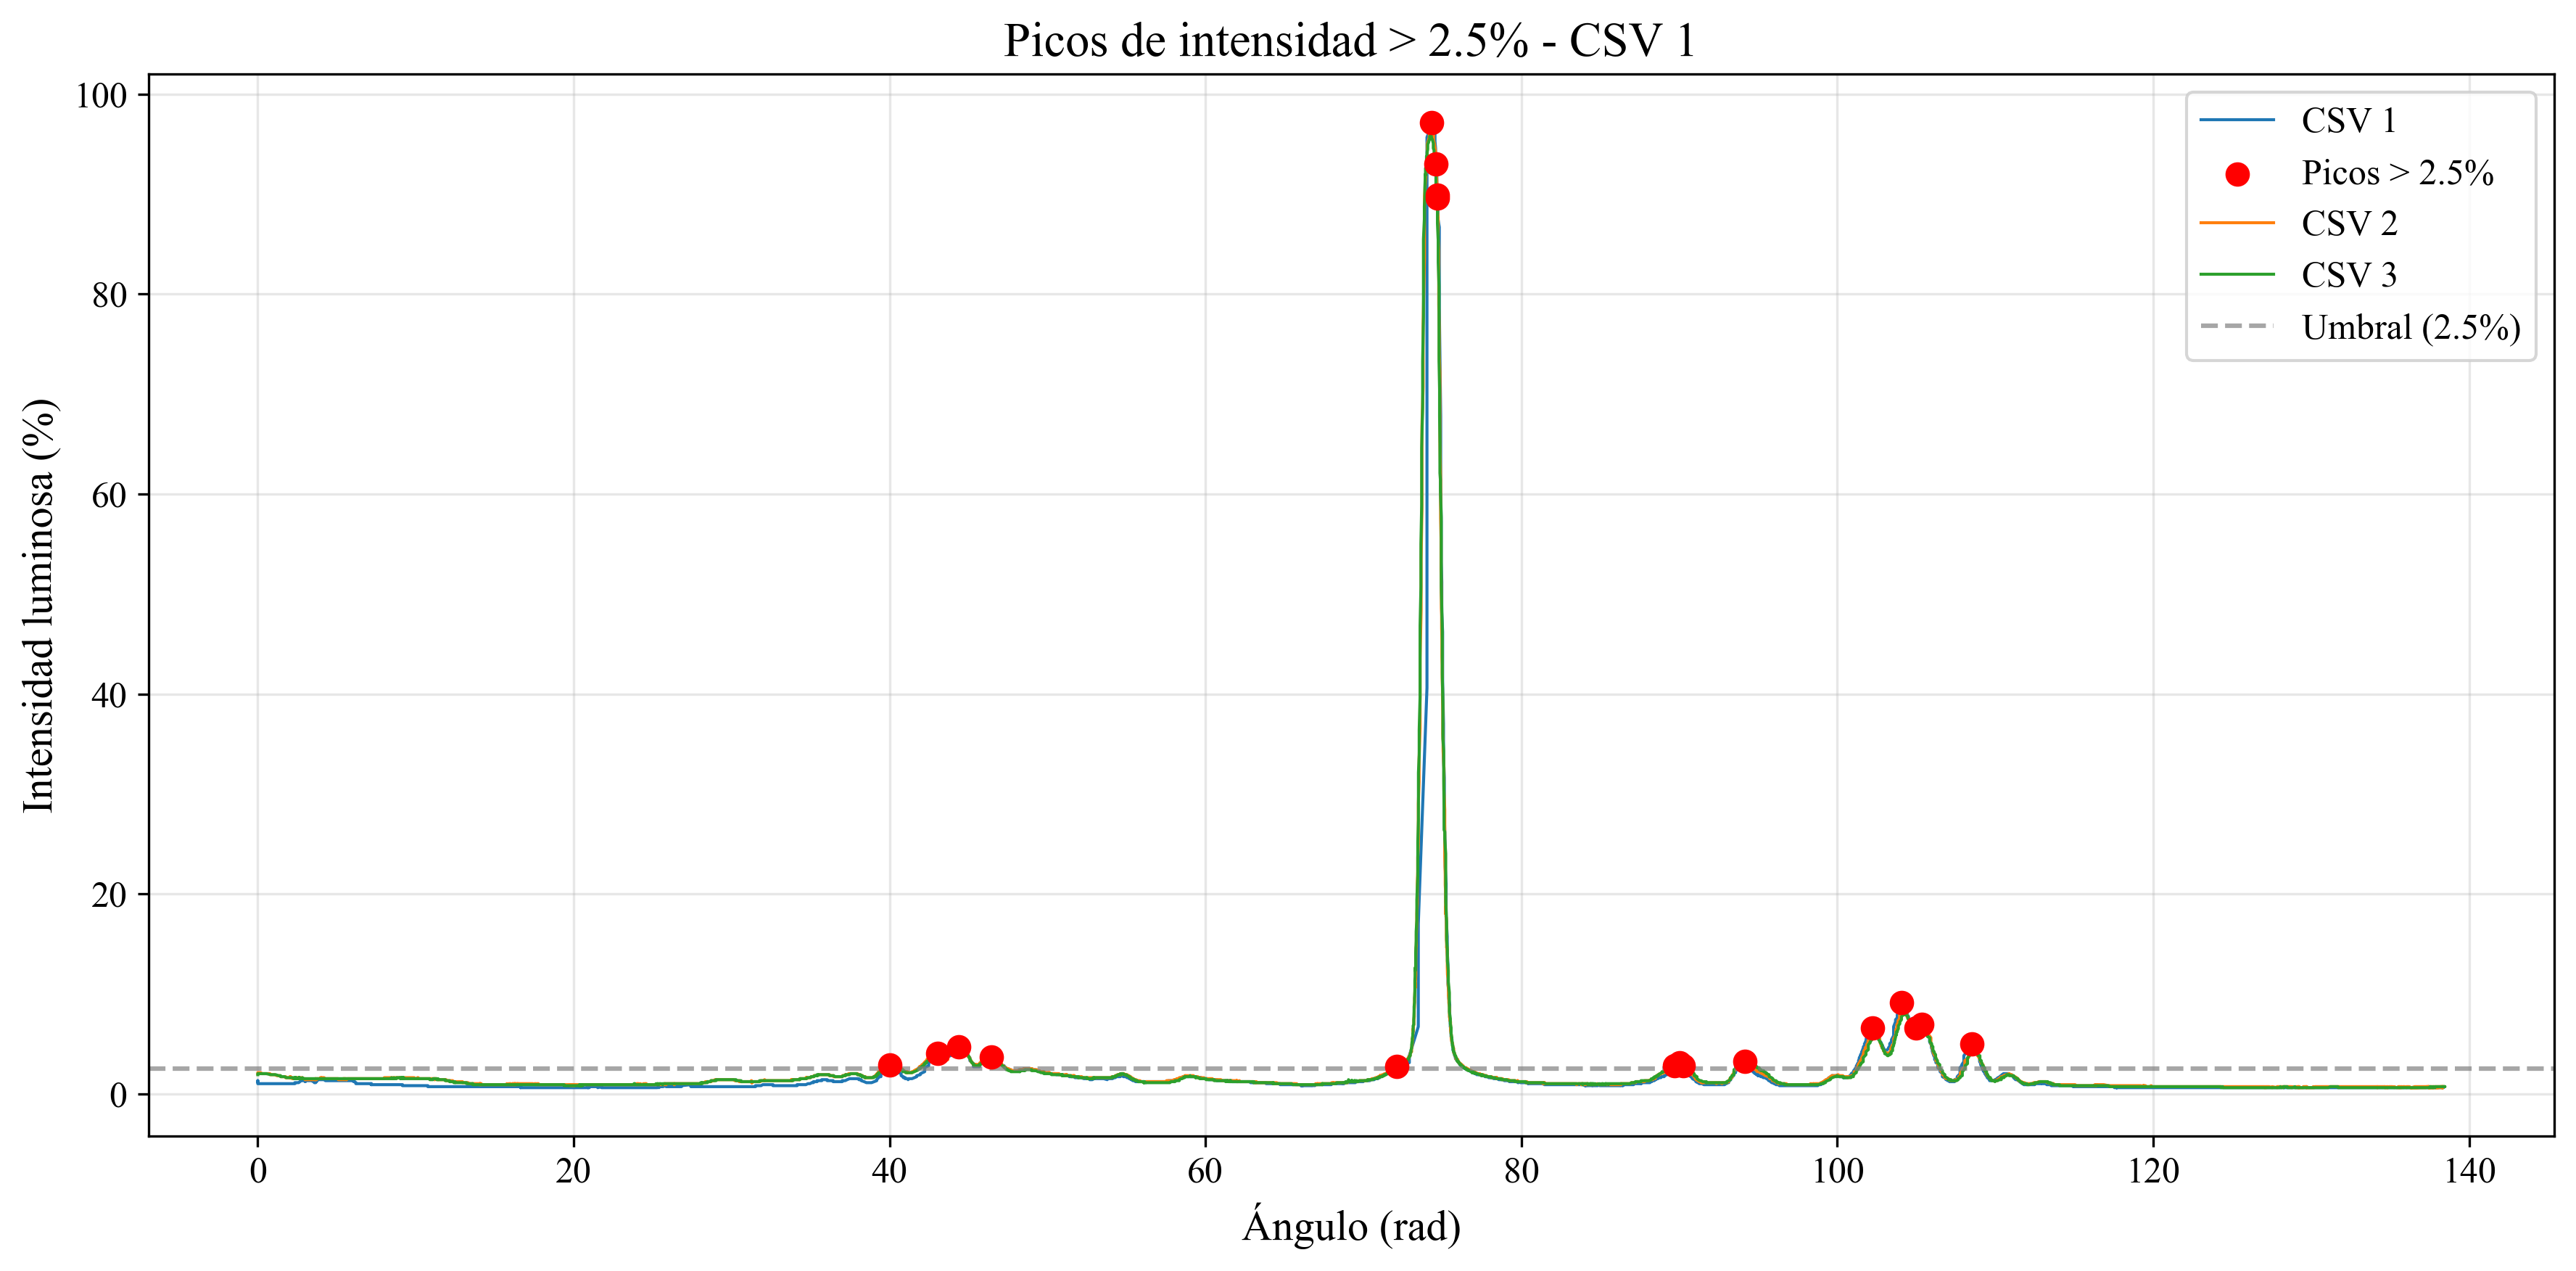


Pico principal: Ángulo: 74.33800 rad, Intensidad: 97.20%


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Función para cargar y limpiar datos
def cargar_datos_csv(nombre_csv):
    df = pd.read_csv(nombre_csv, sep=';', decimal=',', encoding='utf-8')

    col_angulo = [c for c in df.columns if "Ángulo" in c][0]
    col_intensidad = [c for c in df.columns if "Intensidad" in c][0]

    df_clean = df.dropna(subset=[col_angulo, col_intensidad], how='all')
    df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
    df_clean = df_clean.dropna(subset=[col_intensidad])

    angulos = df_clean[col_angulo].values
    intensidades = df_clean[col_intensidad].values

    return angulos, intensidades

# Cargar el primer archivo
ang1, inten1 = cargar_datos_csv("1.csv")

# Encontrar todos los picos con intensidad > 2.5%
umbral_intensidad = 2.5
picos_idx, _ = find_peaks(inten1, height=umbral_intensidad, distance=10)  # distance evita picos muy cercanos

# Filtrar picos que superan el umbral
picos_filtrados = []
for idx in picos_idx:
    if inten1[idx] > umbral_intensidad:
        picos_filtrados.append((ang1[idx], inten1[idx]))

# Mostrar resultados
print(f"Picos con intensidad > {umbral_intensidad}% en CSV 1:")
print("Ángulo (rad)\tIntensidad (%)")
print("-" * 30)
for angulo, intensidad in picos_filtrados:
    print(f"{angulo:.5f}\t\t{intensidad:.2f}%")

# Graficar con los picos marcados
plt.figure(figsize=(12, 6))
plt.plot(ang1, inten1, label="CSV 1", linewidth=1)
plt.scatter([p[0] for p in picos_filtrados], [p[1] for p in picos_filtrados], 
           color='red', s=50, zorder=5, label=f'Picos > {umbral_intensidad}%')
plt.plot(ang2, inten2, label="CSV 2", linewidth=1)
plt.plot(ang3, inten3, label="CSV 3", linewidth=1)
# Marcar el umbral
plt.axhline(y=umbral_intensidad, color='gray', linestyle='--', alpha=0.7, label=f'Umbral ({umbral_intensidad}%)')

plt.xlabel("Ángulo (rad)")
plt.ylabel("Intensidad luminosa (%)")
plt.title("Picos de intensidad > 2.5% - CSV 1")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("picos_csv1.png", dpi=300)
plt.show()

# Mostrar también el pico principal
idx_max = np.argmax(inten1)
pico_principal = (ang1[idx_max], inten1[idx_max])
print(f"\nPico principal: Ángulo: {pico_principal[0]:.5f} rad, Intensidad: {pico_principal[1]:.2f}%")

C:\Users\USER\AppData\Local\Temp\ipykernel_6156\1845313178.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')


PICOS DESTACADOS:
Primer pico: Ángulo = 40.03300 rad, Intensidad = 2.90%
Último pico: Ángulo = 108.51600 rad, Intensidad = 5.00%
Pico máximo: Ángulo = 74.33800 rad, Intensidad = 97.20%


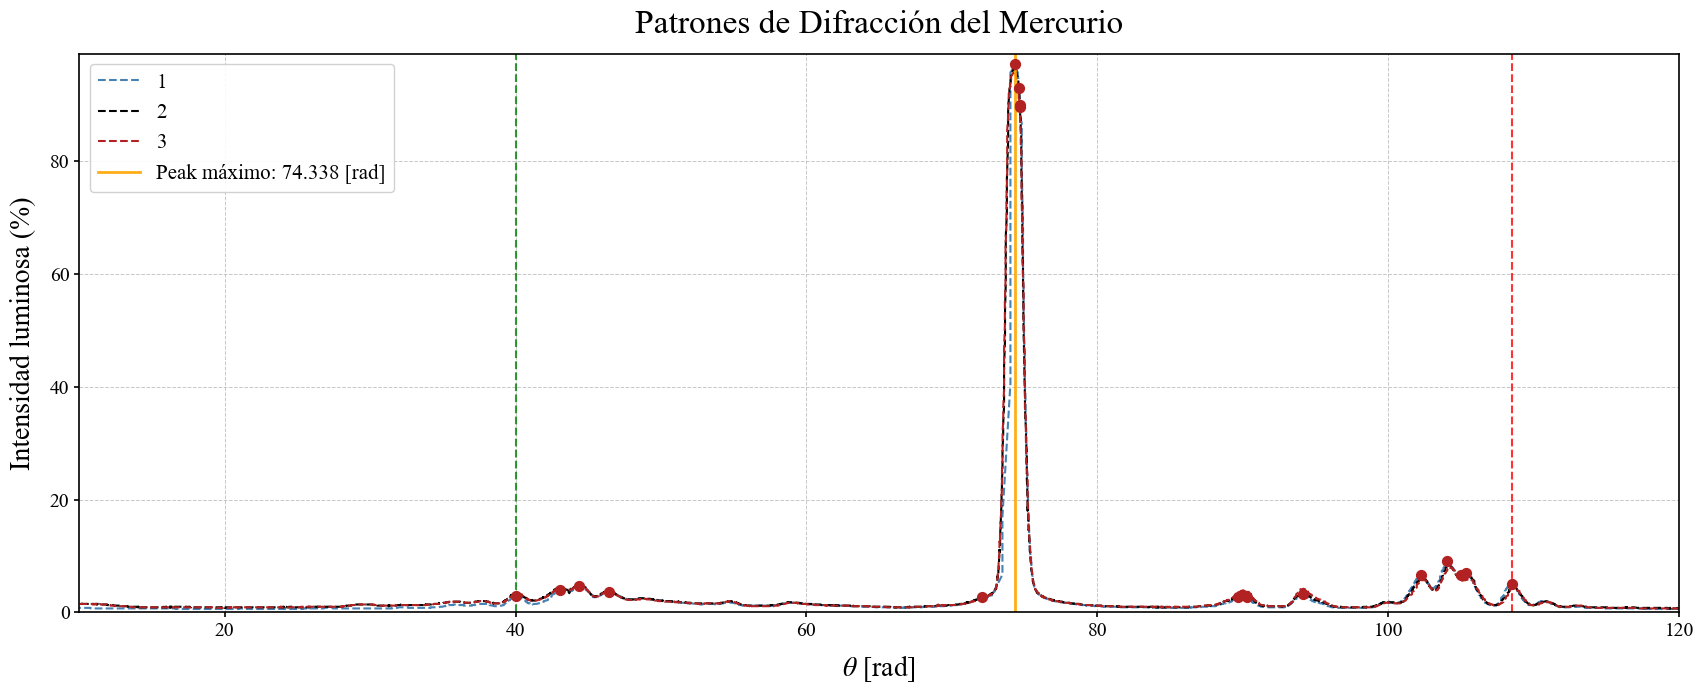


Todos los picos con intensidad > 2.5%:
Ángulo (rad)	Intensidad (%)
------------------------------
40.03300		2.90%
43.06200		4.00%
44.37500		4.70%
46.44300		3.70%
72.09100		2.70%
74.33800		97.20%
74.60800		93.00%
74.67400		89.90%
74.68700		89.60%
89.69700		2.80%
90.03300		3.10%
90.26400		2.80%
94.14700		3.20%
102.22400		6.60%
104.06500		9.10%
104.97700		6.60%
105.37000		6.90%
108.51600		5.00%


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Función para cargar y limpiar datos
def cargar_datos_csv(nombre_csv):
    df = pd.read_csv(nombre_csv, sep=';', decimal=',', encoding='utf-8')

    col_angulo = [c for c in df.columns if "Ángulo" in c][0]
    col_intensidad = [c for c in df.columns if "Intensidad" in c][0]

    df_clean = df.dropna(subset=[col_angulo, col_intensidad], how='all')
    df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
    df_clean = df_clean.dropna(subset=[col_intensidad])

    angulos = df_clean[col_angulo].values
    intensidades = df_clean[col_intensidad].values

    return angulos, intensidades

# Cargar el primer archivo
ang1, inten1 = cargar_datos_csv("1.csv")
# Encontrar todos los picos con intensidad > 2.5%
umbral_intensidad = 2.5
picos_idx, _ = find_peaks(inten1, height=umbral_intensidad, distance=10)

# Obtener todos los picos que superan el umbral
picos_filtrados = []
for idx in picos_idx:
    if inten1[idx] > umbral_intensidad:
        picos_filtrados.append((ang1[idx], inten1[idx]))

# Ordenar los picos por ángulo (ascendente)
picos_filtrados.sort(key=lambda x: x[0])

# Identificar los picos especiales
primer_pico = picos_filtrados[0] if picos_filtrados else None
ultimo_pico = picos_filtrados[-1] if picos_filtrados else None
pico_max_intensidad = max(picos_filtrados, key=lambda x: x[1]) if picos_filtrados else None

# Mostrar resultados
print("PICOS DESTACADOS:")
if primer_pico:
    print(f"Primer pico: Ángulo = {primer_pico[0]:.5f} rad, Intensidad = {primer_pico[1]:.2f}%")
if ultimo_pico:
    print(f"Último pico: Ángulo = {ultimo_pico[0]:.5f} rad, Intensidad = {ultimo_pico[1]:.2f}%")
if pico_max_intensidad:
    print(f"Pico máximo: Ángulo = {pico_max_intensidad[0]:.5f} rad, Intensidad = {pico_max_intensidad[1]:.2f}%")

# Graficar
plt.figure(figsize=(17,7))
plt.plot(ang1, inten1,"--", label="1", linewidth=1.5, color='steelblue')
plt.plot(ang2, inten2,"--",  label="2", linewidth=1.5,color="black")
plt.plot(ang3, inten3,"--", label="3", linewidth=1.5,color='firebrick')
# Agregar líneas verticales solo para los picos especiales
if primer_pico:
    plt.axvline(x=primer_pico[0], color='green', linestyle='--', alpha=0.8, linewidth=1.5 )

if ultimo_pico:
    plt.axvline(x=ultimo_pico[0], color='red', linestyle='--', alpha=0.8, linewidth=1.5)

if pico_max_intensidad:
    plt.axvline(x=pico_max_intensidad[0], color='orange', linestyle='-', alpha=0.9, linewidth=2,
               label=f'Peak máximo: {pico_max_intensidad[0]:.3f} [rad]')

plt.xlabel(r"$\theta$ [rad]", fontsize=20, labelpad=10)
plt.ylabel("Intensidad luminosa (%)", fontsize=20, labelpad=10)
plt.title("Patrones de Difracción del Mercurio", fontsize=24, pad=15)
plt.legend(loc='upper left', framealpha=0.9, fancybox=True,fontsize=15)
# Añadir grid
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.xlim(10,120)
plt.ylim(0,99)
plt.scatter([p[0] for p in picos_filtrados], [p[1] for p in picos_filtrados], 
           color='firebrick', s=50, zorder=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("picos_destacados_csv1.png", dpi=300)
plt.show()
# Mostrar también todos los picos encontrados
print(f"\nTodos los picos con intensidad > {umbral_intensidad}%:")
print("Ángulo (rad)\tIntensidad (%)")
print("-" * 30)
for angulo, intensidad in picos_filtrados:
    print(f"{angulo:.5f}\t\t{intensidad:.2f}%")

[  0.           0.           0.         ... 664.55245346 664.55245346
 664.55245346]


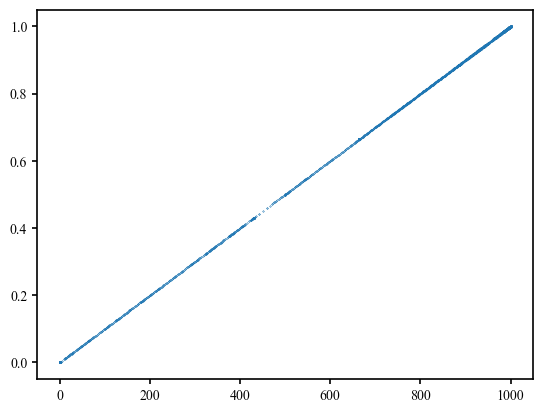

In [72]:
sins=np.sin(ang1*np.pi/180)
k=10**9  / 1000000
lamm=k*sins
print(lamm)
plt.scatter(lamm,sins,s=0.05)

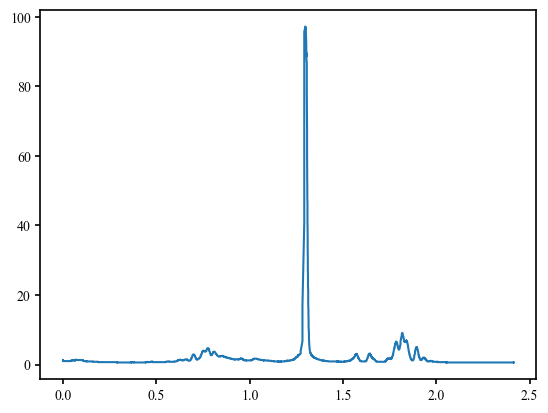

In [76]:
plt.plot(ang1*np.pi/180,inten1)

C:\Users\USER\AppData\Local\Temp\ipykernel_6156\117890651.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\117890651.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\117890651.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')


PICOS DESTACADOS:
Primer pico: Ángulo = 0.34935 rad, Intensidad = 2.90%
Último pico: Ángulo = 0.94698 rad, Intensidad = 5.00%
Pico máximo: Ángulo = 0.64872 rad, Intensidad = 97.20%


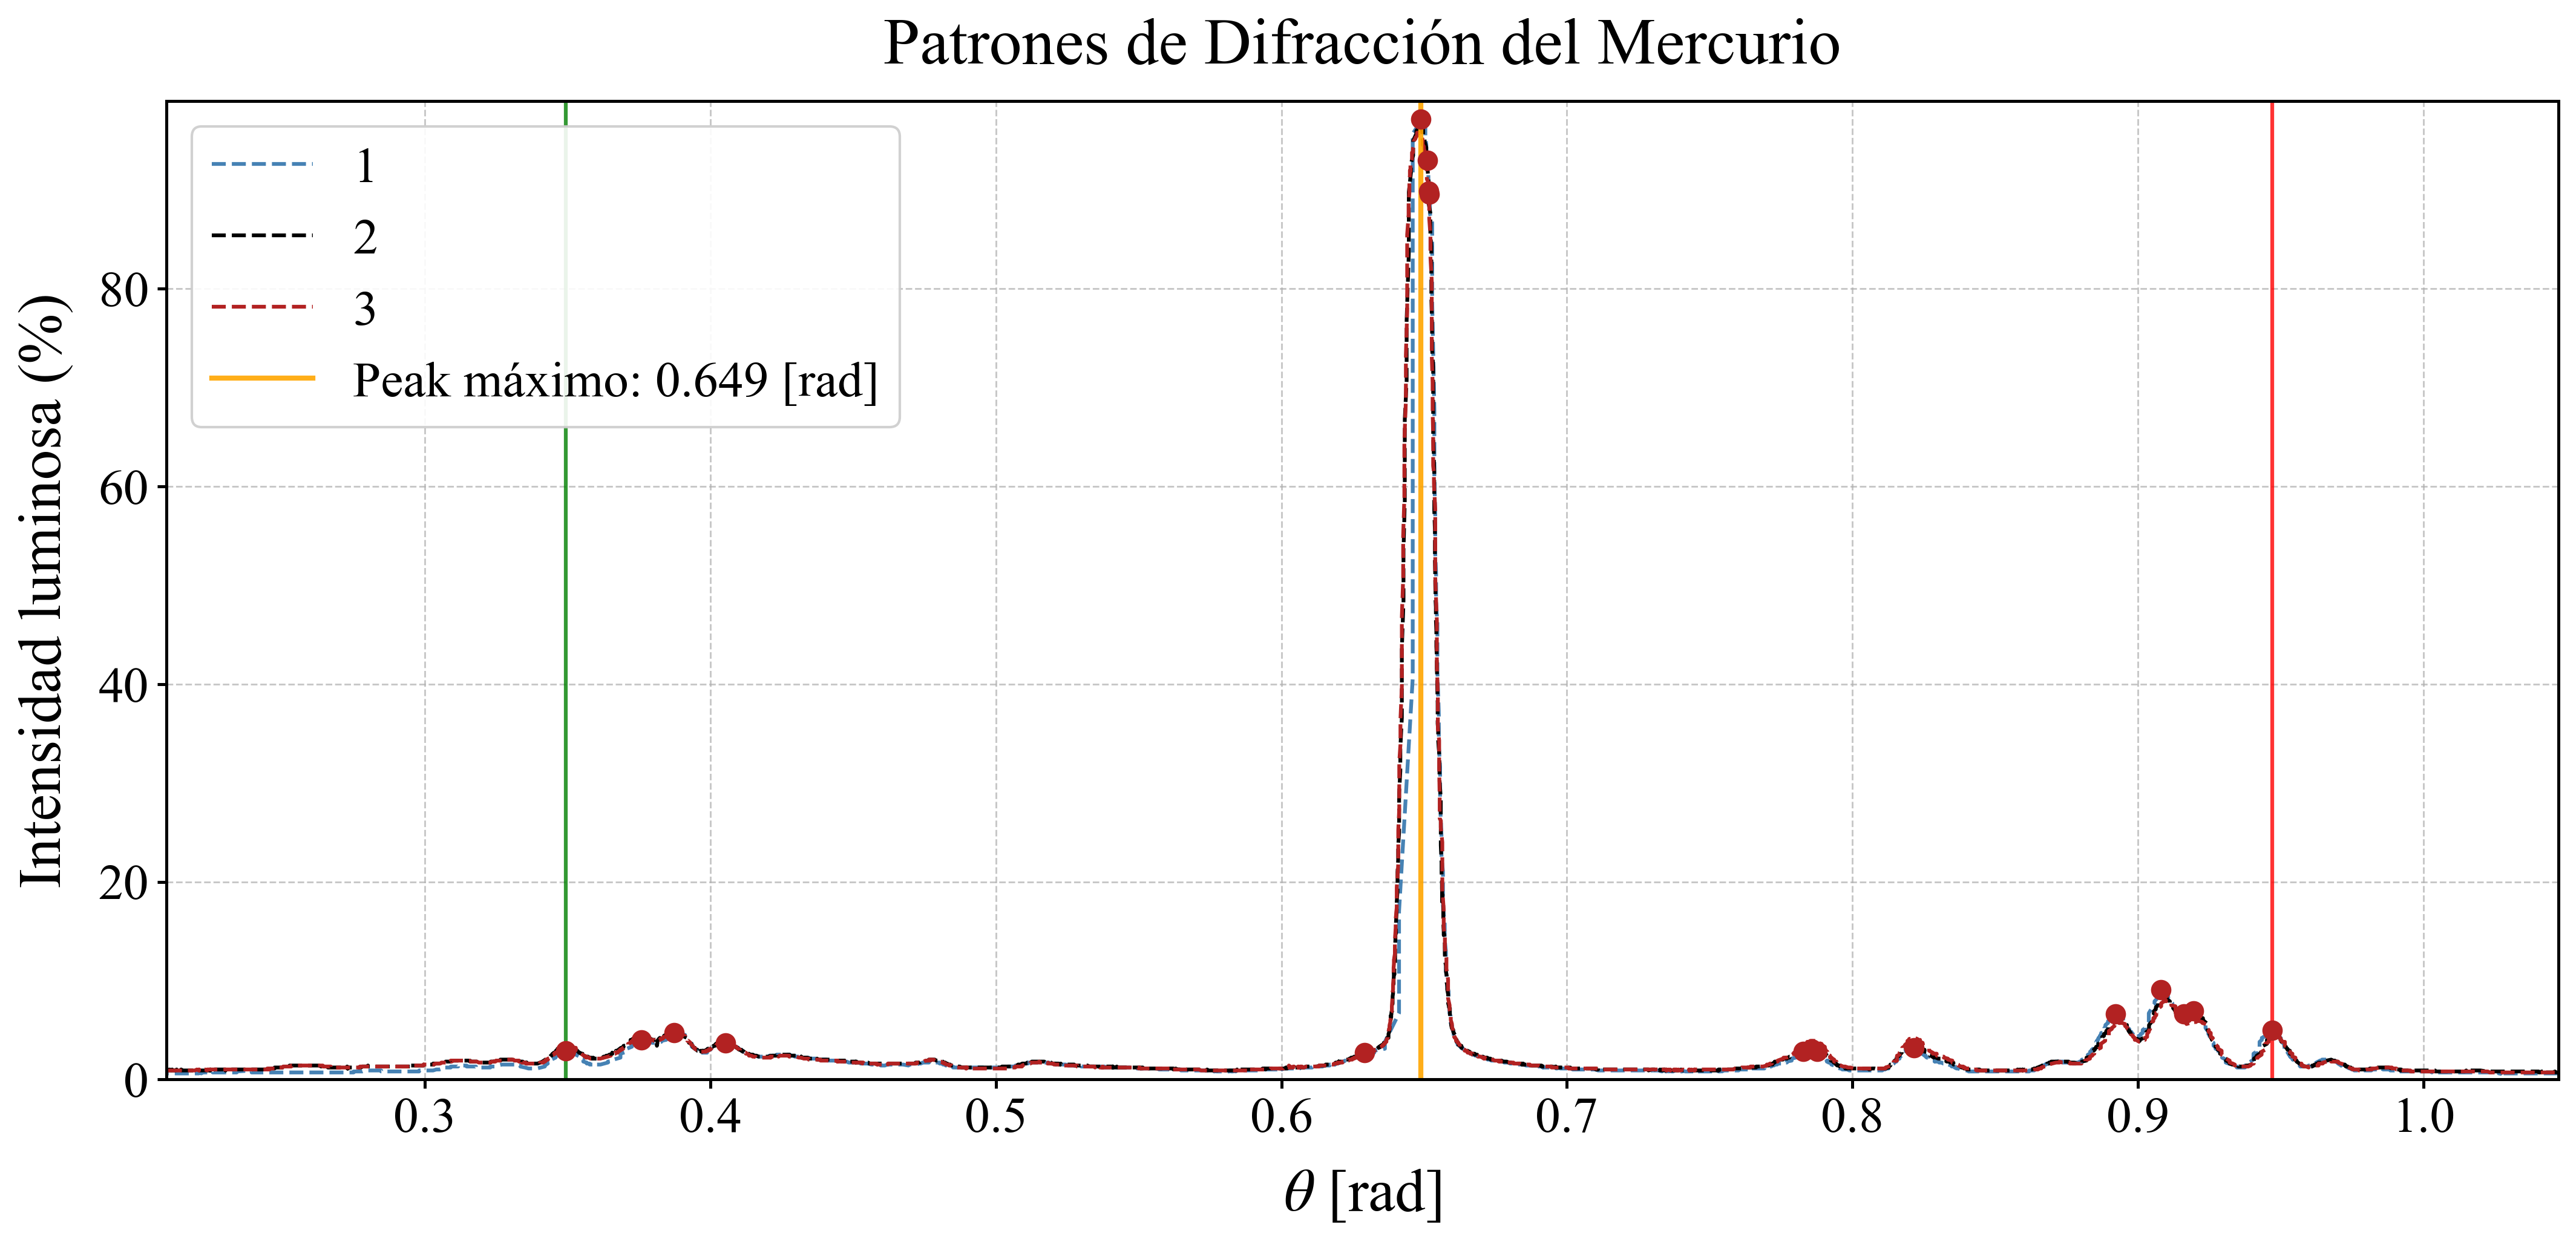


Todos los picos con intensidad > 2.5%:
Ángulo (rad)	Intensidad (%)
------------------------------
0.34935		2.90%
0.37579		4.00%
0.38724		4.70%
0.40529		3.70%
0.62911		2.70%
0.64872		97.20%
0.65108		93.00%
0.65165		89.90%
0.65177		89.60%
0.78275		2.80%
0.78569		3.10%
0.78770		2.80%
0.82159		3.20%
0.89207		6.60%
0.90814		9.10%
0.91610		6.60%
0.91953		6.90%
0.94698		5.00%


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Función para cargar y limpiar datos
def cargar_datos_csv(nombre_csv):
    df = pd.read_csv(nombre_csv, sep=';', decimal=',', encoding='utf-8')

    col_angulo = [c for c in df.columns if "Ángulo" in c][0]
    col_intensidad = [c for c in df.columns if "Intensidad" in c][0]

    df_clean = df.dropna(subset=[col_angulo, col_intensidad], how='all')
    df_clean[col_angulo] = df_clean[col_angulo].fillna(method='ffill')
    df_clean = df_clean.dropna(subset=[col_intensidad])

    angulos = df_clean[col_angulo].values/2
    intensidades = df_clean[col_intensidad].values

    return angulos, intensidades

# Cargar el primer archivo
ang1, inten1 = cargar_datos_csv("1.csv")

# CONVERTIR ÁNGULOS DE GRADOS A RADIANES
ang1_rad = np.radians(ang1)

# Encontrar todos los picos con intensidad > 2.5%
umbral_intensidad = 2.5
picos_idx, _ = find_peaks(inten1, height=umbral_intensidad, distance=10)
ang2, inten2 = cargar_datos_csv("2.csv")
ang2_rad = np.radians(ang2)
ang3, inten3 = cargar_datos_csv("3.csv")
ang3_rad = np.radians(ang3)
# Obtener todos los picos que superan el umbral
picos_filtrados = []
for idx in picos_idx:
    if inten1[idx] > umbral_intensidad:
        picos_filtrados.append((ang1_rad[idx], inten1[idx]))

# Ordenar los picos por ángulo (ascendente)
picos_filtrados.sort(key=lambda x: x[0])

# Identificar los picos especiales
primer_pico = picos_filtrados[0] if picos_filtrados else None
ultimo_pico = picos_filtrados[-1] if picos_filtrados else None
pico_max_intensidad = max(picos_filtrados, key=lambda x: x[1]) if picos_filtrados else None

# Mostrar resultados
print("PICOS DESTACADOS:")
if primer_pico:
    print(f"Primer pico: Ángulo = {primer_pico[0]:.5f} rad, Intensidad = {primer_pico[1]:.2f}%")
if ultimo_pico:
    print(f"Último pico: Ángulo = {ultimo_pico[0]:.5f} rad, Intensidad = {ultimo_pico[1]:.2f}%")
if pico_max_intensidad:
    print(f"Pico máximo: Ángulo = {pico_max_intensidad[0]:.5f} rad, Intensidad = {pico_max_intensidad[1]:.2f}%")

# Graficar (usando ángulos en radianes)
plt.figure(figsize=(17,7))
plt.plot(ang1_rad, inten1, "--", label="1", linewidth=1.5, color='steelblue')

# Si necesitas cargar y convertir otros archivos, descomenta y ajusta:

plt.plot(ang2_rad, inten2, "--", label="2", linewidth=1.5, color="black")

plt.plot(ang3_rad, inten3, "--", label="3", linewidth=1.5, color='firebrick')

# Agregar líneas verticales solo para los picos especiales
if primer_pico:
    plt.axvline(x=primer_pico[0], color='green', linestyle='-', alpha=0.8, linewidth=1.5)

if ultimo_pico:
    plt.axvline(x=ultimo_pico[0], color='red', linestyle='-', alpha=0.8, linewidth=1.5)

if pico_max_intensidad:
    plt.axvline(x=pico_max_intensidad[0], color='orange', linestyle='-', alpha=0.9, linewidth=2,
               label=f'Peak máximo: {pico_max_intensidad[0]:.3f} [rad]')

plt.xlabel(r"$\theta$ [rad]", fontsize=24, labelpad=10)
plt.ylabel("Intensidad luminosa (%)", fontsize=24, labelpad=10)
plt.title("Patrones de Difracción del Mercurio", fontsize=26, pad=15)
plt.legend(loc='upper left', framealpha=0.9, fancybox=True, fontsize=20)

# Añadir grid
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Ajustar límites para radianes (10-120° ≈ 0.17-2.09 rad)
plt.xlim(np.radians(12), np.radians(60))
plt.ylim(0, 99)

plt.scatter([p[0] for p in picos_filtrados], [p[1] for p in picos_filtrados], 
           color='firebrick', s=50, zorder=5, label='Picos detectados')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("picos_destacados_csv1.png", dpi=300)
plt.show()

# Mostrar también todos los picos encontrados
print(f"\nTodos los picos con intensidad > {umbral_intensidad}%:")
print("Ángulo (rad)\tIntensidad (%)")
print("-" * 30)
for angulo, intensidad in picos_filtrados:
    print(f"{angulo:.5f}\t\t{intensidad:.2f}%")

In [265]:
k=10**9  / 600000
def lam(thetass):
    return k*np.sin(thetass/2)
print(lam(0.649	))

531.3915343332314


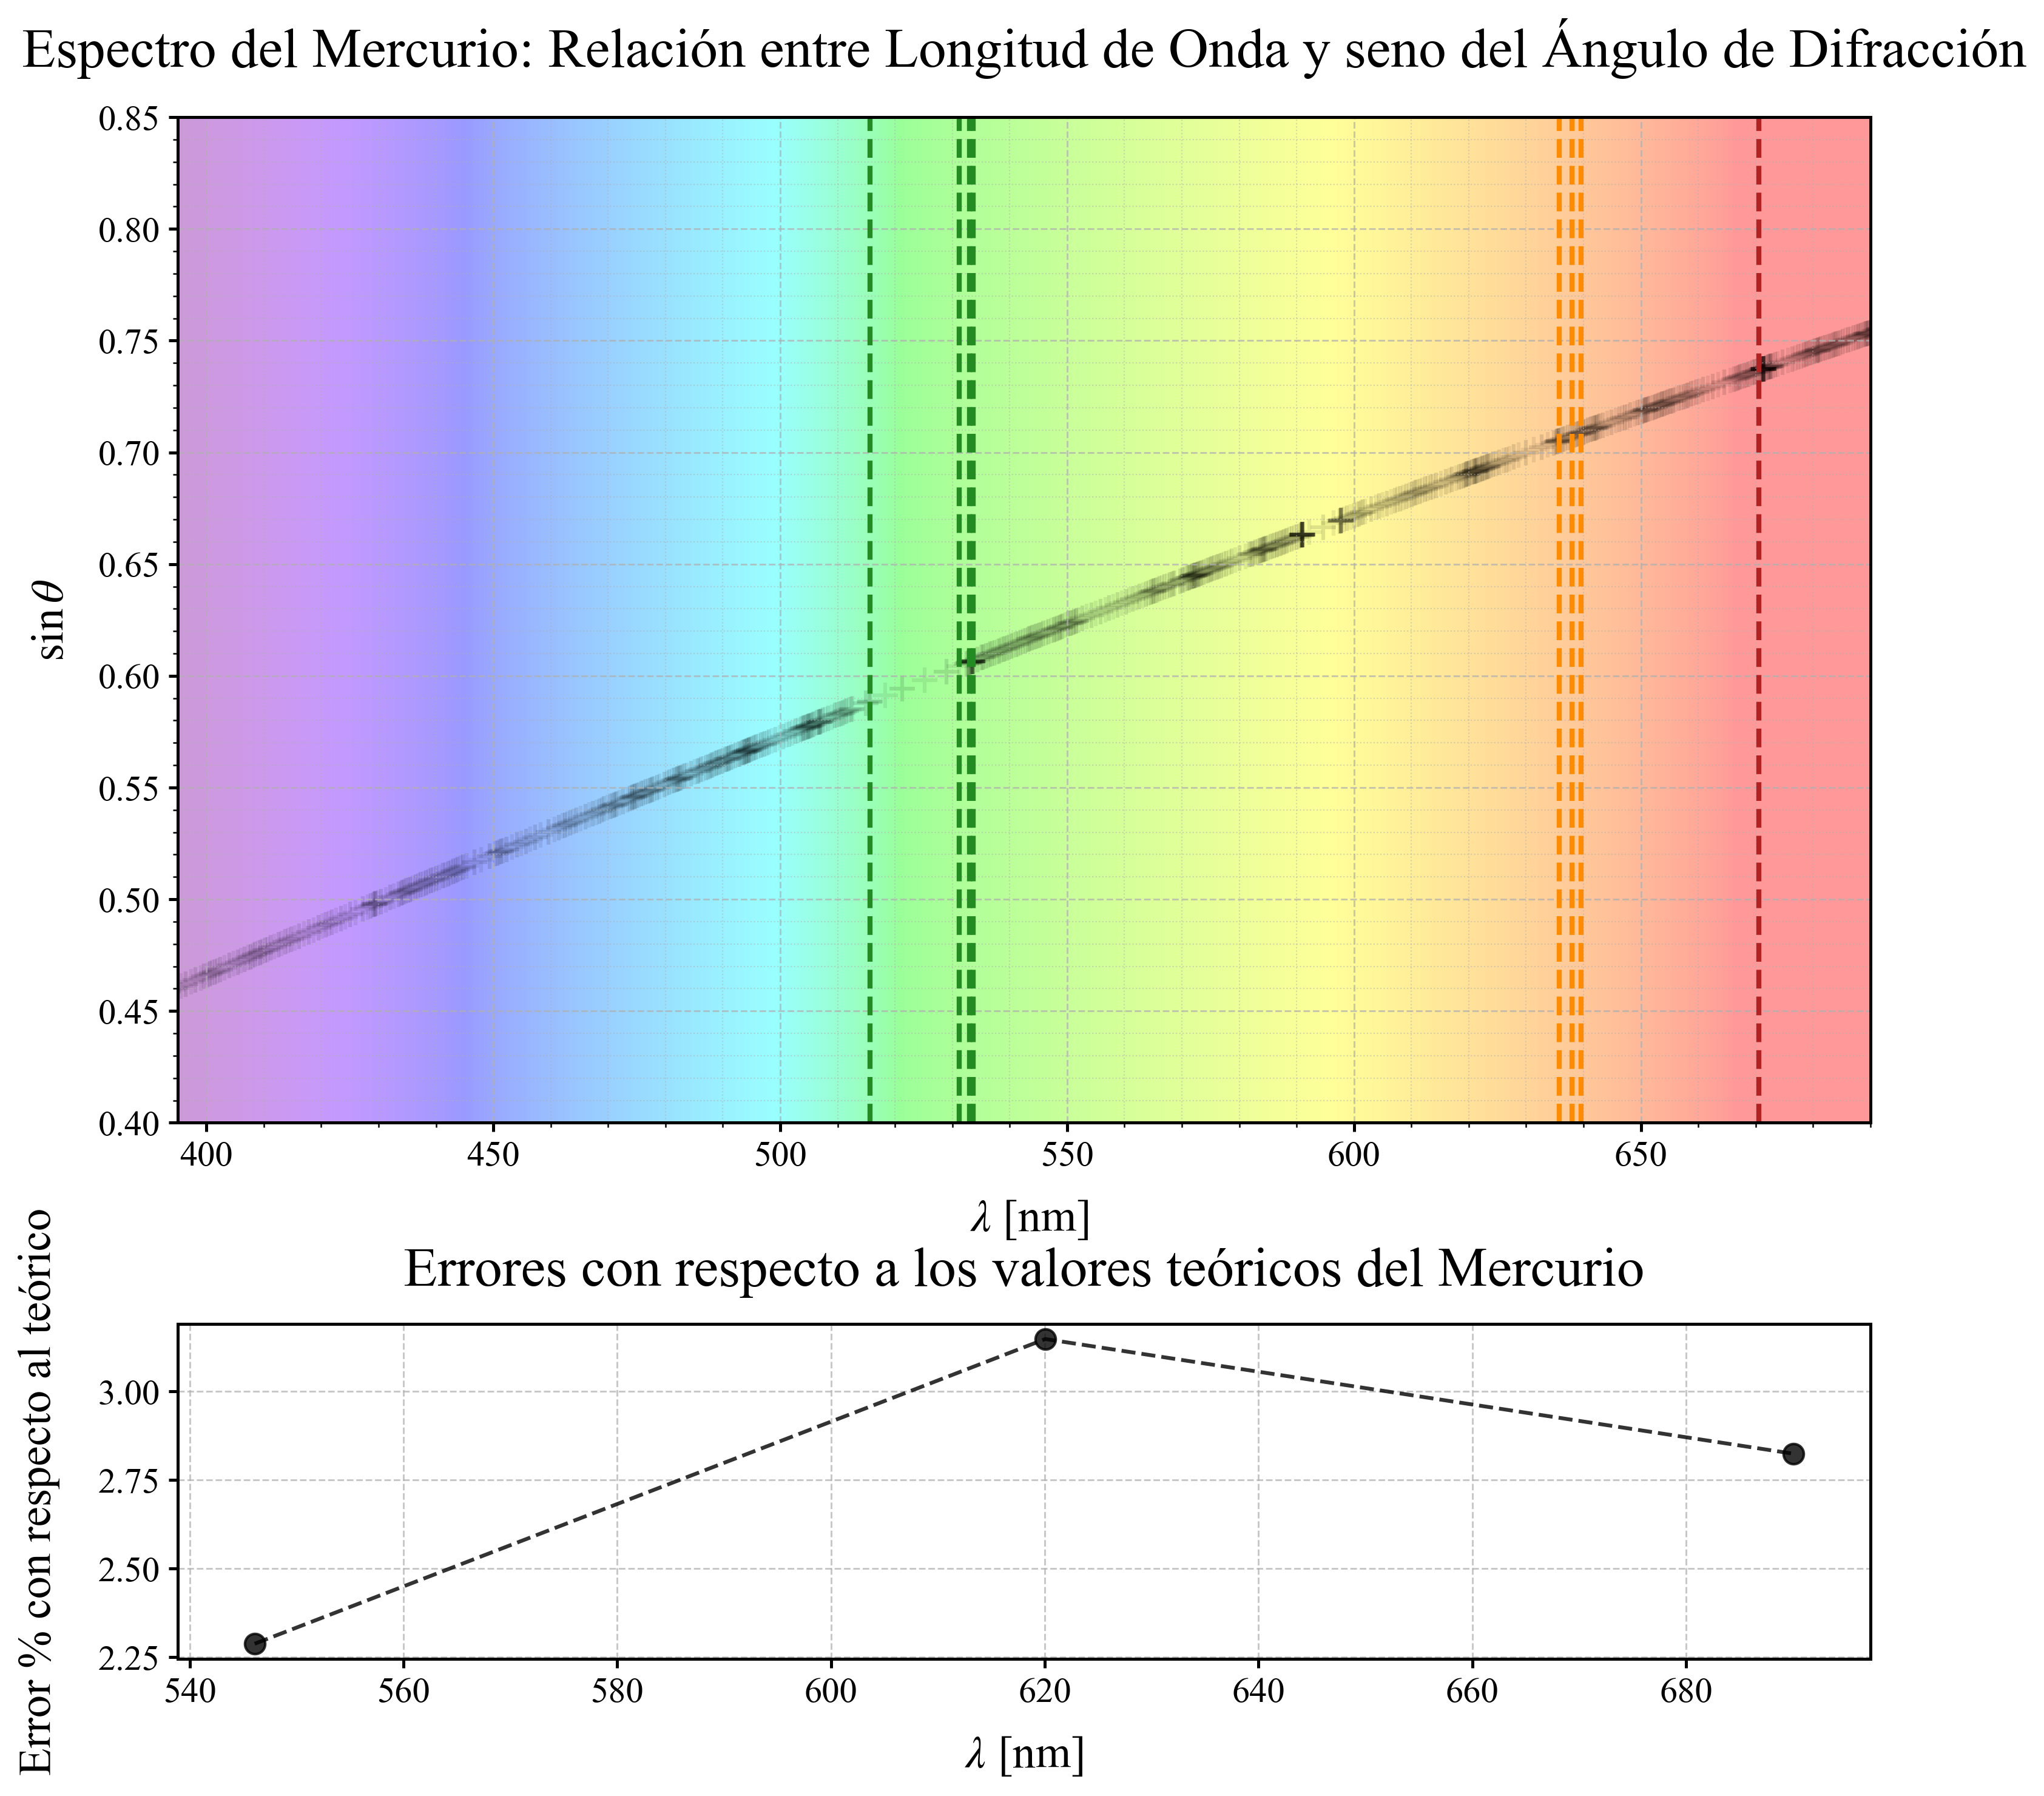

<Figure size 4500x3600 with 0 Axes>

In [263]:

k=10**9  / 600000
def lam(thetass):
    return k*np.sin(thetass/2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
x=np.array(lam(ang1_rad))
y=np.array(np.sin(ang1_rad))
def wavelength_to_rgb(wavelength):
    gamma = 0.8
    intensity_max = 255
    factor = 0.0
    R = G = B = 0

    if 380 <= wavelength < 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 <= wavelength < 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif 490 <= wavelength < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif 510 <= wavelength < 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 <= wavelength < 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    elif 645 <= wavelength <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    
    if 380 <= wavelength < 420:
        factor = 0.3 + 0.7*(wavelength - 380) / (420 - 380)
    elif 420 <= wavelength < 701:
        factor = 1.0
    elif 701 <= wavelength <= 780:
        factor = 0.3 + 0.7*(780 - wavelength) / (780 - 700)
    
    R = round(intensity_max * (R * factor)**gamma)
    G = round(intensity_max * (G * factor)**gamma)
    B = round(intensity_max * (B * factor)**gamma)

    return (R/255, G/255, B/255)
# Crear gradiente del espectro visible
wavelengths = np.linspace(380, 750, 1000)
colors = [wavelength_to_rgb(w) for w in wavelengths]

# Crear figura con dos subplots
fig = plt.figure(figsize=(12, 11))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.3)

# Primer subplot: datos principales
ax1 = fig.add_subplot(gs[0])
plt.figure(figsize=(15,12))
# Imagen de fondo (espectro continuo)
gradient = np.array([colors])  # banda horizontal
ax1.imshow(gradient, extent=[380, 780, ax1.get_ylim()[0], ax1.get_ylim()[1]],
           aspect="auto", alpha=0.4, zorder=1)
ax1.scatter(lam(ang1_rad),np.sin(ang1_rad),s=100,alpha=0.04,color="black",marker="+")



ax1.set_title("Espectro del Mercurio: Relación entre Longitud de Onda y seno del Ángulo de Difracción", 
              fontsize=22, pad=20)
ax1.set_xlabel(r" $\lambda$ [nm]", fontsize=18, labelpad=10)
ax1.set_ylabel(r"$\sin\theta$", fontsize=18, labelpad=10)

# Configurar límites y ticks
ax1.set_xlim(395, 690)
ax1.set_ylim(0.4, 0.85)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
# Añadir grid
ax1.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
ax1.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
# Suponiendo que quieres una línea en x = 75
ax1.axvline(x=515.6555602954123, color='forestgreen', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=531.1703733984365, color='forestgreen', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=533.0341177819583, color='forestgreen', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=533.5788859918272, color='forestgreen', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=635.7663421382117, color='darkorange', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=638.0303987041706, color='darkorange', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=639.5774808980017, color='darkorange', linestyle='--', linewidth=2, alpha=1)
ax1.axvline(x=670.5638549937263, color='firebrick', linestyle='--', linewidth=2, alpha=1)

# Segundo subplot: residuales
ax2 = fig.add_subplot(gs[1])
lambdas_teo=np.array([546.07348,620.05,690.05])
lambdas_exp=np.array([533.5788,639.57,670.56])
residuals = np.abs(lambdas_exp - lambdas_teo)*100/lambdas_teo

# Graficar residuales
#ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.plot(lambdas_teo, residuals, '--o', color='black', markersize=8, alpha=0.8)

# Etiquetas y título para residuales
ax2.set_xlabel(r"$\lambda$ [nm]", fontsize=18, labelpad=10)
ax2.set_ylabel(r"Error % con respecto al teórico", fontsize=18, labelpad=15)
ax2.set_title("Errores con respecto a los valores teóricos del Mercurio", fontsize=22, pad=15)

# Configurar grid para residuales
ax2.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
ax2.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Ajustar diseño
plt.tight_layout()

# Opciones:
# color='red' → color de la línea
# linestyle='--' → línea punteada
# linewidth=2 → grosor
# alpha=0.7 → transparencia

# Mejorar la leyenda
#ax1.legend(loc='upper center', framealpha=0.9)



In [266]:
print(residuals)

[2.288095   3.14813322 2.82443301]
